Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds 
from tensorflow.keras.models import Sequential

print(tf.__version__)


2.4.1


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12428570990353525804, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11862158609141914973
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_path = "gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration"
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [54]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(root_path + "/Train")
data_dir_test = pathlib.Path(root_path + "/Test")

In [50]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [52]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size = (180, 180), color_mode = 'rgb', shuffle = True, validation_split = 0.2, subset = 'training',
                                                               seed = 123, batch_size = 32)

## NOTE: Since this cell was ran again after dealing with the class imbalance using augmentor, it is showing the total number of files after augmenting

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [53]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size = (180, 180), color_mode = 'rgb', shuffle = True, validation_split = 0.2, subset ='validation',   
                                                               seed = 123, batch_size = 32)
## NOTE: Since this cell was ran again after dealing with the class imbalance using augmentor, it is showing the total number of files after augmenting

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

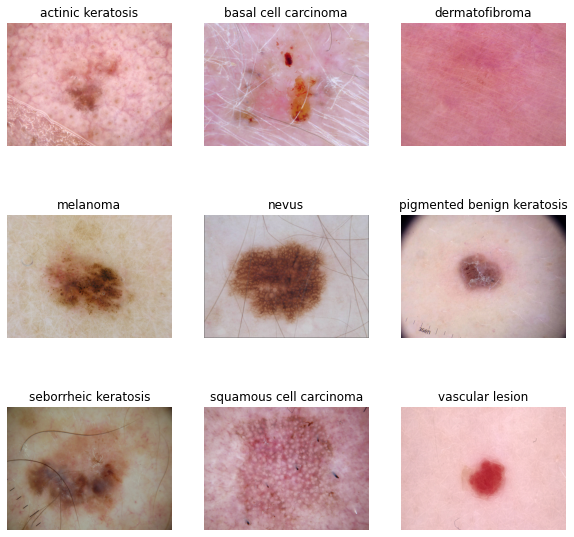

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as matimg

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize = (10, 10))

for i, cls in enumerate(class_names):
    ax = plt.subplot(3, 3, i + 1)
    images = list(data_dir_train.glob(cls + '/*'))
    img = matimg.imread(str(images[0]))
    plt.imshow(img)
    plt.title(cls)                                         
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental import preprocessing




model = Sequential(preprocessing.Rescaling(scale = 1.0 / 255, offset = 0.0, input_shape = (180, 180, 3)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
    
model.add(Conv2D(128, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (2, 2)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(len(class_names)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 179, 179, 32)      416       
_________________________________________________________________
activation (Activation)      (None, 179, 179, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 179, 179, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 64)      8256      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 178, 178, 64)      2

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function

from tensorflow.keras.optimizers import Adam

opt = Adam()
model.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20, 
  verbose=1)

Epoch 1/20
56/56 [==============================] - 92s 2s/step - loss: 3.4302 - accuracy: 0.3354 - val_loss: 4.9356 - val_accuracy: 0.0537
Epoch 2/20
56/56 [==============================] - 4s 68ms/step - loss: 1.6808 - accuracy: 0.4219 - val_loss: 5.8821 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - 4s 68ms/step - loss: 1.5130 - accuracy: 0.4788 - val_loss: 6.5563 - val_accuracy: 0.1991
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.3716 - accuracy: 0.4994 - val_loss: 9.6838 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 4s 69ms/step - loss: 1.2789 - accuracy: 0.5368 - val_loss: 11.2001 - val_accuracy: 0.1566
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.1700 - accuracy: 0.5781 - val_loss: 8.3341 - val_accuracy: 0.2282
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.1291 - accuracy: 0.5887 - val_loss: 5.8983 - val_accuracy: 0.2461
Epoch 8/20
56

### Visualizing training results

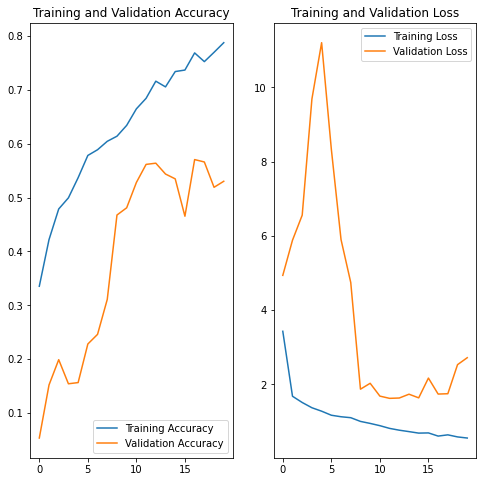

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

### Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 


The accuracy of the validation set is much lower than that of the training set. This clearly indicates that the network in overfitting. 

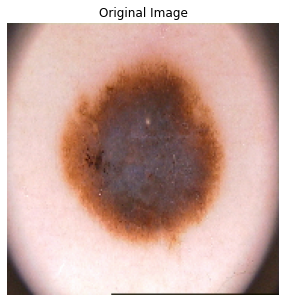

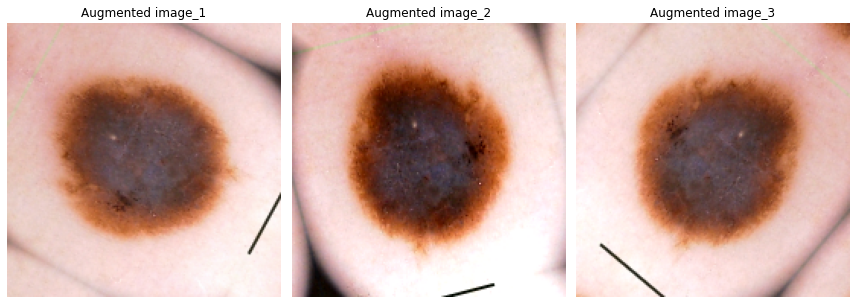

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

original_aug = tf.keras.Sequential(layers.experimental.preprocessing.Rescaling(1.0 / 255))


# Extracting the images and labels from the 1st batch of the training dataset
images = [image for images in train_ds.take(1) for image in images]


image_1 = tf.expand_dims(images[0][2], 0)
original_img = original_aug(image_1)
clipped_org = np.clip(original_img, 0, 1)

plt.figure(figsize = (5, 5))



plt.imshow(clipped_org[0])
plt.title('Original Image')
plt.axis("off")
plt.show()

print("\n\n")


# The augmentation strategy consists of 
augmentation = tf.keras.Sequential([
  
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.35),
  layers.experimental.preprocessing.Rescaling(1./255), 
  layers.experimental.preprocessing.RandomContrast(0.3)
])

plt.figure(figsize = (12, 12))

for i in range(3): 
  image = tf.expand_dims(images[0][2], 0)
  augmented_image = augmentation(image)
  clipped_aug = np.clip(augmented_image, 0, 1)
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(clipped_aug[0])
  plt.title(f"Augmented image_{i + 1}")
  plt.axis("off")
  plt.tight_layout()


### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
dataset_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.25),
  layers.experimental.preprocessing.Rescaling(scale = 1.0/255), 
  layers.experimental.preprocessing.RandomContrast(0.3)])

model_1 = Sequential(dataset_augmentation)
# Adding the data augmentation object 

model_1.add(Conv2D(32, (2, 2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (2, 2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3, 3)))
    
model_1.add(Conv2D(128, (2, 2), padding='same'))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3, 3)))

model_1.add(Conv2D(256, (2, 2)))
model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(3, 3)))

model_1.add(Flatten())
model_1.add(Dense(256))
model_1.add(Activation('relu'))
model_1.add(Dense(len(class_names)))
model_1.add(Activation('softmax'))


model_1.build(input_shape = (None, 180, 180, 3))
model_1.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 179, 179, 32)      416       
_________________________________________________________________
activation_6 (Activation)    (None, 179, 179, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 179, 179, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 64)      8256      
_________________________________________________________________
activation_7 (Activation)    (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 178, 178, 64)     

### Compiling the model

In [22]:
## Your code goes here
opt = Adam()
model_1.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs = 20)

Epoch 1/20
56/56 [==============================] - 5s 77ms/step - loss: 4.0468 - accuracy: 0.2842 - val_loss: 13.1879 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 1.4608 - accuracy: 0.4823 - val_loss: 18.9802 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 4s 75ms/step - loss: 1.3198 - accuracy: 0.5222 - val_loss: 21.2893 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 4s 74ms/step - loss: 1.2729 - accuracy: 0.5603 - val_loss: 14.4365 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 4s 75ms/step - loss: 1.2134 - accuracy: 0.5634 - val_loss: 6.7383 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 1.1149 - accuracy: 0.6094 - val_loss: 4.7129 - val_accuracy: 0.2819
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 1.1383 - accuracy: 0.6189 - val_loss: 3.3214 - val_accuracy: 0.3065
Epoch 8/2

### Visualizing the results

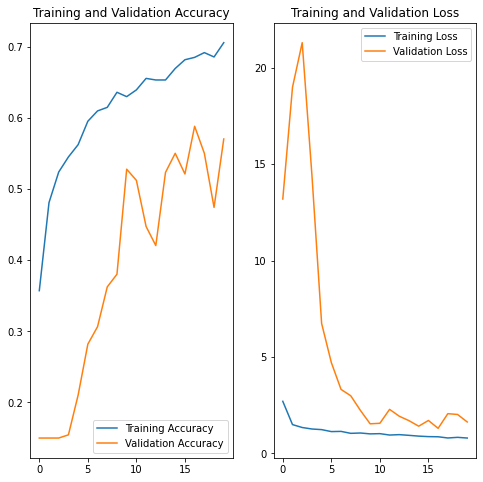

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
from glob2 import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000019.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000028.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000041.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000020.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000037.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000033.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collabora

In [26]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',


In [27]:
original_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(original_dict.items()),columns = ['Path','Label'])

original_df.head()

,Path,Label
0,gdrive/My Drive/Colab Notebooks/CNN Assignment...,Train
1,gdrive/My Drive/Colab Notebooks/CNN Assignment...,Train
2,gdrive/My Drive/Colab Notebooks/CNN Assignment...,Train
3,gdrive/My Drive/Colab Notebooks/CNN Assignment...,Train
4,gdrive/My Drive/Colab Notebooks/CNN Assignment...,Train


In [28]:
original_df.shape

(2239, 2)

In [29]:
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical

def load_data_from_dir(dir_path): 
  data_file = load_files(dir_path)
  class_files = np.array(data_file['filenames'])
  targets = to_categorical(np.array(data_file['target']), 9)

  return class_files, targets

train_files, train_targets = load_data_from_dir(data_dir_train)

train_files[0:15]

array(['gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/ISIC_0000417.jpg',
       'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0032642.jpg',
       'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027884.jpg',
       'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000507.jpg',
       'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0033608.jpg',
       'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/ISIC_0033860.jpg',
       'gdrive/My Drive/Colab Not

Counter({'pigmented benign keratosis': 462,
         'melanoma': 438,
         'basal cell carcinoma': 376,
         'nevus': 357,
         'squamous cell carcinoma': 181,
         'vascular lesion': 139,
         'actinic keratosis': 114,
         'dermatofibroma': 95,
         'seborrheic keratosis': 77})


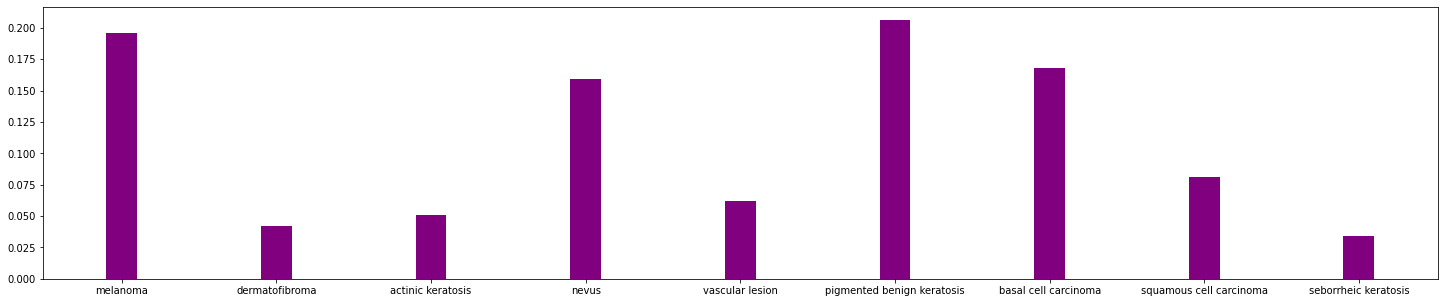

In [30]:
from collections import Counter
import pprint

# Splitting the classes from filenames and counting each instance of every class using the counter object 
filenames_split = [filename.split('/')[-2] for filename in train_files]

classes_count = Counter(filenames_split)
pprint.pprint(classes_count)
# Plotting the class distribution in the training dataset

normalized_classes_count = [x / sum(classes_count.values()) for x in classes_count.values()]

plt.figure(figsize = (25, 5))
plt.bar(classes_count.keys(), normalized_classes_count, color = ['purple'], width = 0.2)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Seborrheic Keratosis and Dermatofibroma have the least number of samples, both in double digits. 
#### - Which classes dominate the data in terms proportionate number of samples?
Pigmented Benign Keratosis, Melonoma and Basal Cell Carcinoma have the most number of samples. 


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset= str(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31EDEDB310>: 100%|██████████| 500/500 [00:18<00:00, 27.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31EDF3FF10>: 100%|██████████| 500/500 [00:18<00:00, 27.69 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31EDE830D0>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F341450DAD0>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=853x680 at 0x7F31EDFCC310>:   0%|          | 1/500 [00:00<01:02,  7.93 Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F3420459B90>: 100%|██████████| 500/500 [01:25<00:00,  5.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F31EDFAC390>: 100%|██████████| 500/500 [00:19<00:00, 25.74 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F34144871D0>: 100%|██████████| 500/500 [00:42<00:00, 11.81 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F31EDF4C510>:   0%|          | 1/500 [00:00<01:19,  6.26 Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F34200DF290>: 100%|██████████| 500/500 [00:19<00:00, 25.50 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F34200BC3D0>:   0%|          | 1/500 [00:00<00:53,  9.27 Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F34202E3DD0>: 100%|██████████| 500/500 [00:20<00:00, 24.94 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [44]:
path_list_new

['gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000543.jpg_7568b58d-9001-41a9-83ac-c8ec7b397d41.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000248.jpg_2a89f217-5852-481b-9625-92dac1b594fc.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000330.jpg_d0d49f7d-1d12-4000-b18a-7cf9a934a122.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0024468.jpg_51b85528-b160-4d55-b3ea-2725fb13b3c0.jpg',
 'gdrive/My Drive/Colab Notebooks/CNN Assignment files/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [36]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [37]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
new_df['Label'].value_counts()

Train                         2239
actinic keratosis              500
seborrheic keratosis           500
dermatofibroma                 500
basal cell carcinoma           500
squamous cell carcinoma        500
nevus                          500
pigmented benign keratosis     500
melanoma                       500
vascular lesion                500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [55]:
data_dir_train_aug = data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(180, 180),
  batch_size=32)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [56]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_aug,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [63]:
## your code goes here
model_2 = Sequential(dataset_augmentation)
# Adding the data augmentation object 

model_2.add(Conv2D(32, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())                     # Including batch normalization 
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Dropout(0.15))                            # Including dropouts
    
model_2.add(Conv2D(128, (2, 2), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())                     # Including batch normalization
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Dropout(0.15))                            # Including dropouts


model_2.add(Conv2D(256, (2, 2)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())                     # Including batch normalization
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Dropout(0.15))                            # Including dropouts


model_2.add(Flatten())
model_2.add(Dense(256))
model_2.add(Activation('relu'))
model_2.add(Dense(len(class_names)))
model_2.add(Activation('softmax'))


model_2.build(input_shape = (None, 180, 180, 3))
model_2.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 179, 179, 32)      416       
_________________________________________________________________
activation_18 (Activation)   (None, 179, 179, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 179, 179, 32)      128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 178, 178, 64)      8256      
_________________________________________________________________
activation_19 (Activation)   (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 178, 178, 64)     

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [64]:
## Your code goes here
opt = Adam()
model_2.compile(optimizer=opt,
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [67]:
epoch = 20
## Your code goes here, use 20 epochs.
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epoch)

Epoch 1/20
169/169 [==============================] - 50s 290ms/step - loss: 1.4953 - accuracy: 0.4523 - val_loss: 19.3012 - val_accuracy: 0.1440
Epoch 2/20
169/169 [==============================] - 50s 287ms/step - loss: 1.3078 - accuracy: 0.4968 - val_loss: 8.1690 - val_accuracy: 0.2628
Epoch 3/20
169/169 [==============================] - 50s 287ms/step - loss: 1.2558 - accuracy: 0.5269 - val_loss: 1.8477 - val_accuracy: 0.4306
Epoch 4/20
169/169 [==============================] - 50s 289ms/step - loss: 1.1731 - accuracy: 0.5414 - val_loss: 2.2992 - val_accuracy: 0.4232
Epoch 5/20
169/169 [==============================] - 50s 287ms/step - loss: 1.1438 - accuracy: 0.5593 - val_loss: 2.4688 - val_accuracy: 0.4558
Epoch 6/20
169/169 [==============================] - 50s 291ms/step - loss: 1.1007 - accuracy: 0.5797 - val_loss: 1.3147 - val_accuracy: 0.5464
Epoch 7/20
169/169 [==============================] - 50s 290ms/step - loss: 1.0499 - accuracy: 0.5951 - val_loss: 1.7038 - val_a

In [69]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, image_size = (180, 180), color_mode = 'rgb', shuffle = True, seed = 123, batch_size = 32)

model_2.evaluate(test_ds)

Found 118 files belonging to 9 classes.
4/4 [==============================] - 37s 76ms/step - loss: 3.7146 - accuracy: 0.3898


[3.7145721912384033, 0.38983049988746643]

#### **Todo:**  Visualize the model results

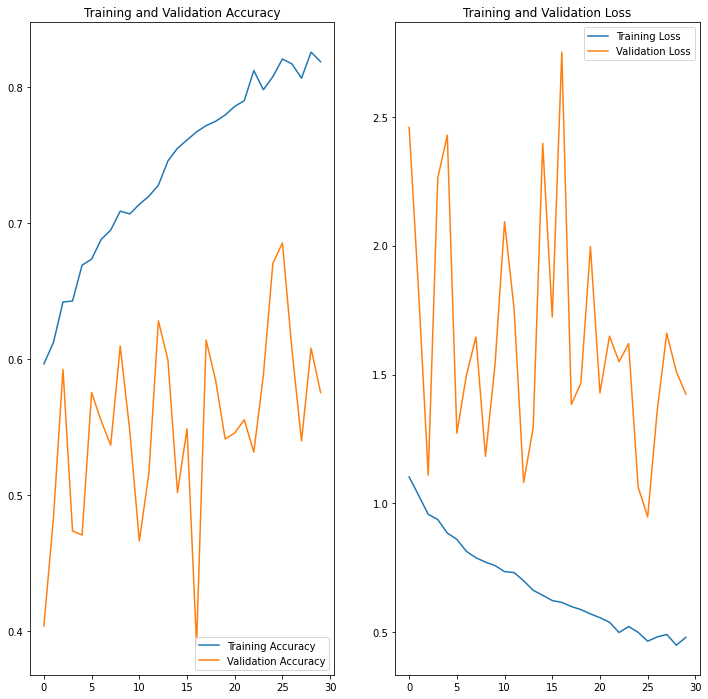

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Final Observations

The final model seems to have resolved the overfitting problem slightly due to augmenting images using strageties like random contrast, random flip, random rotation and handling class imbalance using Augmentor. 

However, the training accuracy of the model hasn't increased much compared to the 2nd model. The following are the training and the validation accuracies of the models trained for this project. 


1. model    --> Training accuracy - 0.78
                Validation accuracy - 0.53

2. model_1  --> Training accuracy - 0.71
                Validation accuracy - 0.57

3. model_2  --> Training accuracy - 0.76
                Validation accuracy - 0.60

The overfitting problem seems to be handled upto a certain extent using data augmentation and handling class imbalance using augmentor. However, to make the model drastically better interms of training and validation accuracies, more organic data might be necessary. 


On evaluating the model on unseen test dataset, the accuracy turned out to be a meagre 38%. This indicates that the model is still overfitting upto some extent and more organic data samples are necessary to make the model better and possibly even experimenting with different network topologies could yield a better and much more optimized model. 



In [ ]:
()